In [142]:
import numpy as np, matplotlib.pyplot as plt, math

In [195]:
# Constants
RADIUS = 10 # metres
DISK_RES = 100 # pixels per metre
PIX_RADIUS = RADIUS * DISK_RES
NUM_BINS = 512
U_MAX = 5.0 / math.sqrt(RADIUS)
BIN_WIDTH = 2 * U_MAX / NUM_BINS
ALPHA = 0.7

In [187]:
def get_brightness(x: float, y: float) -> float:
    r = math.sqrt(x**2 + y**2)
    r_dash = (r + RADIUS) / RADIUS
    if (r > RADIUS):
        return 0.0
    
    # Option 0: smiley face :)
    # if (
    #     (x-RADIUS/3)**2 + (-y-RADIUS/2)**2 <= (RADIUS**2)/35 or
    #     (x- 2*RADIUS/3)**2 + (-y-RADIUS/2)**2 <= (RADIUS**2)/35 or
    #     (
    #         (-y <= RADIUS/8) and 
    #         ((x-RADIUS/2)**2 + (-y-RADIUS/8)**2 <= (RADIUS**2)/8) and
    #         ((x-RADIUS/2)**2 + (-y-RADIUS/8)**2 >= (RADIUS**2)/10)
    #     )
    # ):
    #     return 1
    # return 0.5

    # Option 1: constant
    # return 1

    # Option 2: linear in x
    # return (x + 2*RADIUS) / (4*RADIUS)

    # Option 3: inverse power law:
    # return (r_dash**(-ALPHA))

    # Option 4: combination
    return (((x + 2*RADIUS) / (4*RADIUS)) + (r_dash**(-ALPHA)))/2


In [188]:
def make_brightness_grid() -> list[float, float]:
    # each coordinate represents the corresponding brightness coordinate on the disk
    brightness_grid = np.zeros((PIX_RADIUS*2, PIX_RADIUS*2))

    for i in range(-PIX_RADIUS, PIX_RADIUS):
        for j in range(-PIX_RADIUS, PIX_RADIUS):
            x = j / DISK_RES
            y = i / DISK_RES
            brightness_grid[i+PIX_RADIUS, j+PIX_RADIUS] = get_brightness(x, y)

    return brightness_grid

In [189]:
def generate_disk_img(data: list[float, float], adjust_contrast: bool = True) -> None:
    if (adjust_contrast):
        vmin_percentile = np.percentile(data, 5)
        vmax_percentile = np.percentile(data, 95)
        plt.imshow(data, cmap='plasma', vmin=vmin_percentile, vmax=vmax_percentile)
    else:
        plt.imshow(data, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()

In [190]:
def get_u(x: float, y: float) -> float:
    if (y == 0):
        if (x == 0):
            return math.inf
        numerator = 1
    elif (x == 0):
        return 0
    else:
        numerator = math.cos(math.atan(y / x))
    ans = numerator / ( (x**2 + y**2) ** (1/4) )
    if (x<0):
        ans *= -1
    return ans

In [191]:
def make_u_intensities(brightness_grid: list[float, float], plot: bool = True) -> list[float]:
    bin_starts = np.linspace(-U_MAX, U_MAX, NUM_BINS, endpoint=False)
    u_intensities = np.zeros((NUM_BINS, 2))
    u_intensities[:, 0] = bin_starts
    for i in range(-PIX_RADIUS, PIX_RADIUS):
        for j in range(-PIX_RADIUS, PIX_RADIUS):
            x = j / DISK_RES
            y = i / DISK_RES
            if (x**2 + y**2 > RADIUS**2):
                continue
            u = get_u(x, y)
            if abs(u) > U_MAX:
                continue
            brightness = brightness_grid[i+PIX_RADIUS, j+PIX_RADIUS]
            bin_index = int((u + U_MAX) / BIN_WIDTH)
            if bin_index < 0 or bin_index >= NUM_BINS:
                continue
            u_intensities[bin_index, 1] += brightness
    
    if (plot):
        plt.plot(bin_starts, u_intensities[:, 1])
        plt.grid(True)
        plt.show()

    return u_intensities


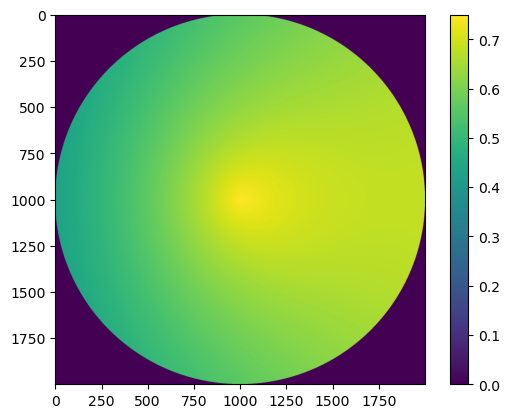

In [196]:
bg = make_brightness_grid()
generate_disk_img(bg, False)

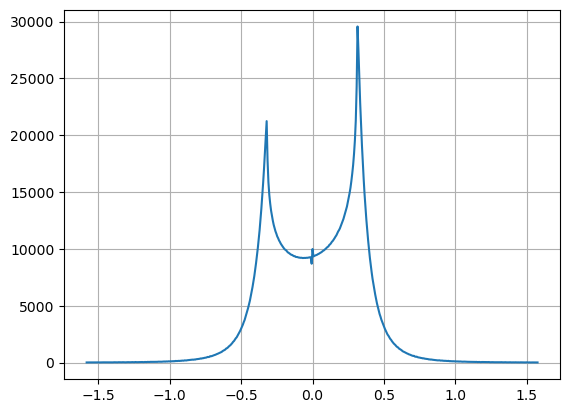

In [197]:
u_intents = make_u_intensities(bg)

In [198]:
print(u_intents[int(NUM_BINS/2) - 4:int(NUM_BINS/2) + 5])

[[-2.47052942e-02  9.25403459e+03]
 [-1.85289707e-02  9.26220816e+03]
 [-1.23526471e-02  9.26748020e+03]
 [-6.17632356e-03  8.69832434e+03]
 [ 0.00000000e+00  9.99184125e+03]
 [ 6.17632356e-03  9.33896370e+03]
 [ 1.23526471e-02  9.38151116e+03]
 [ 1.85289707e-02  9.42136709e+03]
 [ 2.47052942e-02  9.44866639e+03]]
